In [23]:
using BenchmarkTools
using Plots

include("../src/Cosmojuly.jl")
import .Cosmojuly as cj

In [52]:
cj.moments_C03(1)
cj.b_max(8e-3, cj.MM17Gamma1)
cj.number_stellar_encounter(8e-3, cj.MM17Gamma1)

2357

In [ ]:
r = range(0.1, 30, 1000)
plot(r, cj.number_stellar_encounter.(1e-3 .* r, cj.MM17Gamma1))

In [ ]:
cj.velocity_dispersion_spherical(8e-3, 0.5, cj.MM17Gamma1)

In [ ]:
m_array = 10.0.^range(-7, 1.80, 100)
plot(m_array, cj.stellar_mass_function_C03.(m_array), yscale=:log10, xscale=:log10)

In [ ]:

#σ = cj.velocity_dispersion_spherical(8e-3, 0.5, cj.MM17Gamma1)
#vstar = cj.circular_velocity(8e-3, cj.MM17Gamma1)
v_array = 10.0.^range(7.710588749443367e-6, log10(7*σ), 200)
plot(v_array, cj.pdf_relative_speed.(v_array, σ, vstar), xscale=:log10)

In [ ]:
import Unitful: km, s, Gyr, K, Myr, NoUnits
import UnitfulAstro: Mpc, Gpc, Msun
import PhysicalConstants.CODATA2018: c_0, G as G_NEWTON


#σ = cj.velocity_dispersion_spherical(8e-3, 0.5, cj.MM17Gamma1)
#vstar = cj.circular_velocity(8e-3, cj.MM17Gamma1)


b_m = cj.b_max(8e-3, cj.MM17Gamma1)
G_N = G_NEWTON * Msun / (km^2 * Mpc) * s^2 |> NoUnits 

v_max = 10^(1.80) * 2 * G_N / u / b_m
v_min = 1e-5 * 2 * G_N / u / b_m

println(v_min, " ", v_max)

v_array = 10.0.^range(log10(v_min), log10(v_max), 1000)
res = cj.stellar_mass_function_C03.((v_array * u * b_m)/(2*G_N)) .* cj.pdf_relative_speed.(v_array, σ, vstar) .* v_array
plot(v_array[res .> 0], res[res .> 0], yscale=:log10, xscale=:log10)


In [86]:
import Unitful: km, s, Gyr, K, Myr, NoUnits
import UnitfulAstro: Mpc, Gpc, Msun
import PhysicalConstants.CODATA2018: c_0, G as G_NEWTON

#σ = cj.velocity_dispersion_spherical(8e-3, cj.MM17Gamma1)
#vstar = cj.circular_velocity(8e-3, cj.MM17Gamma1)
mstar_avg = cj.moments_C03(1)
v_avg     = 1.0/cj.average_inverse_relative_speed(σ, vstar)

η_array = 10.0.^range(-5, 3, 100)
#res = cj.cdf_η.(η_array, σ, vstar, mstar_avg, v_avg, cj.MM17Gamma1)
#plot(η_array[res .> 0], res[res .> 0], xscale=:log10)
println(cj.inverse_cdf_η(0.999999999, σ, vstar, mstar_avg, v_avg, cj.MM17Gamma1))

#y_array = 10.0.^range(-8, -0.00000001, 500)
#res = cj.inverse_cdf_η.(y_array, σ, vstar, mstar_avg, v_avg, cj.MM17Gamma1)
#plot(y_array[res .> 0], res[res .> 0], xscale=:log10, yscale=:log10)

1053.3908421016679


In [162]:
cj._save_inverse_cdf_η(8e-3, cj.MM17Gamma1)

true

## Monte Carlo on total the velocity kick

The velocity kick felt by a particle at position $\bf r$ inside a subhalo of tidal radius $r_t$ from an encounter with a star of mass $m_\star$ at speed $v$ and with an impact parameter $\bf b$ is

\begin{equation}
\delta {\bf v} = \left(\frac{2Gm_\star}{vb}\right) \left\{ b\frac{({\bf r} \cdot {\bf \hat e}_v){\bf \hat e}_v -  {\bf r} - {\bf b} }{r^2 - ({\bf r} \cdot {\bf \hat e}_v)^2 + b^2 + 2{\bf r}\cdot {\bf b}} + I(b, r_{\rm t}){\bf \hat e}_b  \right\}
\end{equation}
To simplify the expression we can decompose the fixed vector ${\bf r}$ as
\begin{equation}
{\bf r} = r (\cos \theta_{r} {\bf \hat e}_v + \sin \theta_{r} {\bf \hat n}_\parallel) \quad {\rm with} \quad {\bf \hat n}_\parallel \cdot {\bf \hat e}_v = 0
\end{equation}
and we can do the Monte Carlo analysis for various values of $r$ and $\theta_r$. Moreover we can now write ${\bf b}$ according to ${\bf \hat n}$ as
\begin{equation}
{\bf b} = b (\cos \theta_b {\bf \hat n}_\perp + \sin \theta_b {\bf \hat n}_\parallel )
\end{equation}
with $ {\bf \hat n}_\perp \cdot  {\bf \hat n}_\parallel = 0$ and $ {\bf \hat e}_v \cdot  {\bf \hat n}_\perp = 0$ - in other words, $({\bf \hat e}_v , {\bf \hat n}_\parallel,  {\bf \hat n}_\perp)$ forms an orthonormal basis. We can now write the component of $\delta {\bf v}$ alongside the two new basis vectors (note that $\delta {\bf v}$ is perpendicular to ${\bf \hat e}_v$)
\begin{equation}
\delta {v}_\parallel \equiv \delta {\bf v} \cdot {\bf \hat n}_\parallel = \left(\frac{2Gm_\star}{vb}\right) \left\{I(b, r_{\rm t}) \sin \theta_b - \frac{rb\sin \theta_r + b^2 \sin \theta_b}{r^2\sin^2\theta_r + b^2 + 2rb\sin\theta_r\sin\theta_b}\right\}
\end{equation}
and
\begin{equation}
\delta {v}_\perp \equiv \delta {\bf v} \cdot {\bf \hat n}_\perp = \left(\frac{2Gm_\star}{vb}\right) \left\{I(b, r_{\rm t}) \cos \theta_b - \frac{b^2 \cos \theta_b}{r^2\sin^2\theta_r + b^2 + 2rb\sin\theta_r\sin\theta_b}\right\} \, .
\end{equation}
For a Monte Carlo run we fix $r_{\rm t}$, and $r \sin\theta_r < r_{\rm t}$. We then draw $v$, $b$, $m_\star$ and $\theta_b$ from their own distributions a number $\mathcal{N}_\star$ and finally sum the two velocity components. Eventually we do as much realisation as possible of a run to get enough statistics. The fact that the answer does not depend on $\cos \theta_r$ is due to the symmetry of the problem. By introducing $r_\parallel = r \sin \theta_r$ we can further simplify
\begin{equation}
\delta {v}_\parallel  = \left(\frac{2Gm_\star}{vb}\right) \left\{I(b, r_{\rm t}) \sin \theta_b - \frac{r_\parallel b + b^2 \sin \theta_b}{r_\parallel^2 + b^2 + 2r_\parallel b\sin\theta_b}\right\}
\end{equation}
and 
\begin{equation}
\delta {v}_\perp = \left(\frac{2Gm_\star}{vb}\right) \left\{I(b, r_{\rm t}) \cos \theta_b - \frac{b^2 \cos \theta_b}{r_\parallel^2 + b^2 + 2r_\parallel b\sin\theta_b}\right\} \, .
\end{equation}


For the rest of the discussion we will introduce
\begin{equation}
\delta v_0 = \frac{2G \overline{m_\star}}{\overline{v} b_{\rm max}} \quad {\rm and} \quad \eta = \frac{m_\star}{\overline{m_\star}} \frac{\overline{v}}{v} 
\end{equation}
that has dimension of a velocity and
\begin{equation}
\begin{split}
w_\parallel(b, \theta_b, r_\parallel) & = I(b, r_{\rm t}) \sin \theta_b - \frac{r_\parallel b + b^2 \sin \theta_b}{r_\parallel^2 + b^2 + 2r_\parallel b\sin\theta_b} \\
w_\perp(b, \theta_b, r_\parallel) & = I(b, r_{\rm t}) \cos \theta_b - \frac{b^2 \cos \theta_b}{r_\parallel^2 + b^2 + 2r_\parallel b\sin\theta_b}
\end{split}
\end{equation}
that are dimensionless. Therefore,
\begin{equation}
\begin{split}
\delta v_\parallel & = \delta v_0 \frac{b_{\rm max}}{b}  \eta(m_\star, v)  w_\parallel(b, \theta_b, r_\parallel)  \\
\delta v_\perp & = \delta v_0 \frac{b_{\rm max}}{b}  \eta(m_\star, v)  w_\perp(b, \theta_b, r_\parallel)
\end{split}
\end{equation}
where $\beta = b^2/b_{\rm max}^2$.

From the previous expression we can write down a probability distribution for both quantities knowing $b$ and $r_\parallel$. First we write down an expression for the probability of $X$
\begin{equation}
p_u(u) = \frac{b_{\rm max}}{2G}\int p_{m_\star}\left(\frac{vub_{\rm max}}{2G}\right) p_v(v) v {\rm d} v
\end{equation}
The probability distribution on $\delta v_\parallel$ and $\delta v_\perp$ are therefore
\begin{equation}
\begin{split}
p_{\delta v_\parallel}(\delta v_\parallel \, | \, b, r_\parallel) & =  \frac{b}{2\pi} \int p_X\left(\frac{b \delta v_\parallel}{w_\parallel(b, \theta_b, r_\parallel)}\right) \frac{1}{w_\parallel(b, \theta_b, r_\parallel)}{\rm d} \theta_b \\
p_{\delta v_\perp}(\delta v_\perp \, | \, b, r_\parallel) & =  \frac{b}{2\pi} \int p_X\left(\frac{b \delta v_\perp}{w_\perp(b, \theta_b, r_\parallel)}\right) \frac{1}{w_\perp(b, \theta_b, r_\parallel)}{\rm d} \theta_b 
\end{split}
\end{equation}
assuming that $\theta_b$ is uniformely distributed.

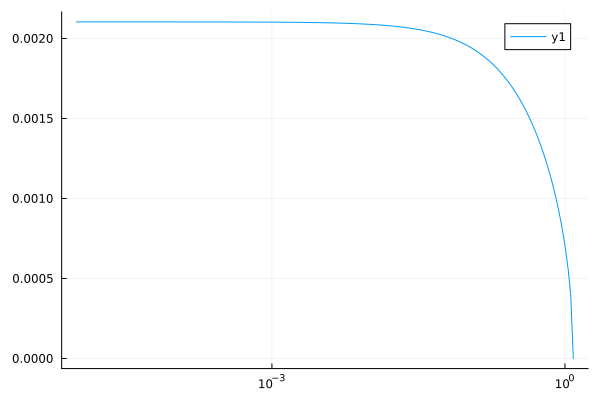

In [25]:
subhalo = cj.halo_from_mΔ_and_cΔ(cj.nfwProfile, 1e-4, 40)
rt = cj.jacobi_radius(8e-3, subhalo, cj.MM17Gamma1)
r_array = 10.0.^range(-5, log10(rt / subhalo.rs ), 200) * subhalo.rs 

plot(r_array / subhalo.rs, cj.escape_velocity.(r_array, rt, subhalo), xscale=:log10)


In [91]:
subhalo = cj.halo_from_mΔ_and_cΔ(cj.nfwProfile, 1e-4, 40)
rt = cj.jacobi_radius(8e-3, subhalo, cj.MM17Gamma1)
r_array = collect(range(- 0.9999 * rt / subhalo.rs, 0.9999 * rt / subhalo.rs, 10))
dvx, dvy = cj.draw_velocity_kick(r_array, subhalo, 8e-3, nrep = 100000, nmem=100000)

([-29.812557658095795 12.258657818630956 … -651.6701549897377 5082.870832862947; -25.44027766805565 6.026115061639585 … -523.7057721584149 1323.8353482707523; … ; 4.137193468055951 14.610305354217692 … 391.6697852877935 2574.0367464898873; -0.9181505491286037 18.267909461205182 … 317.28047425500654 3206.0679014175967], [-67.52945832605066 -148.7677297056108 … 651.9650834893511 14420.074126819023; -58.3413457643206 -115.19427445198072 … 567.2384342865337 10805.00161975934; … ; 114.4047100233761 115.91689073606904 … -1478.0052944449071 -4145.038078710485; 157.1012819920144 156.17448783882057 … -2223.8400813258445 -4751.217582161415])

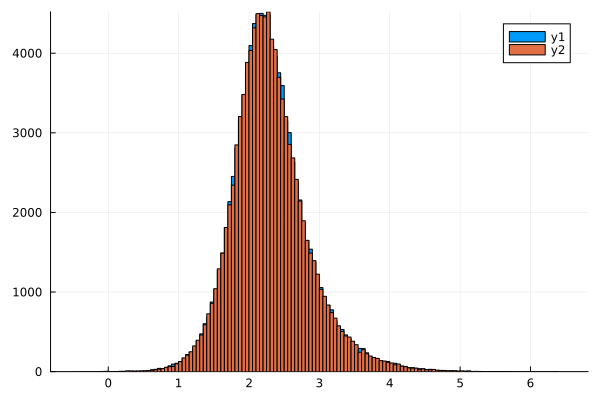

In [105]:
dv = sqrt.(dvx.^2 + dvy.^2)
histogram([log10.(dv[end-1, :]), log10.(dv[2, :])], density=true)

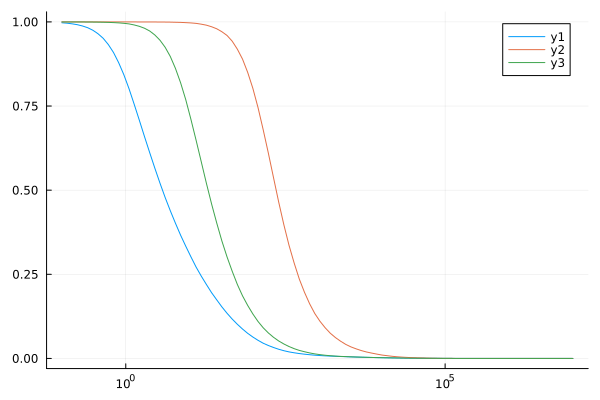

In [29]:
dv = sqrt.(dvx.^2 + dvy.^2)

dv_array   = 10.0.^range(-1, 7, 100)

inv_cumulative1 = [length(dv[1, dv[1, :] .> _dv]) for _dv in dv_array] ./ size(dv)[2]
inv_cumulative2 = [length(dv[end, dv[end, :] .> _dv]) for _dv in dv_array] ./ size(dv)[2]
inv_cumulative3 = [length(dv[5, dv[5, :] .> _dv]) for _dv in dv_array] ./ size(dv)[2]

#length(dv[1, dv[1, :] .< dv_array[end]])

plot(dv_array, inv_cumulative1, xscale=:log10)
plot!(dv_array, inv_cumulative2, xscale=:log10)
plot!(dv_array, inv_cumulative3, xscale=:log10)

In [50]:
import Unitful: km, s, Gyr, K, Myr, NoUnits
import UnitfulAstro: Mpc, Gpc, Msun
import PhysicalConstants.CODATA2018: c_0, G as G_NEWTON


#σ = cj.velocity_dispersion_spherical(8e-3, cj.MM17Gamma1)
#vstar = cj.circular_velocity(8e-3, cj.MM17Gamma1)
mstar_avg = cj.moments_C03(1)
v_avg     = 1.0/cj.average_inverse_relative_speed(σ, vstar)

dv0 = 2*G_NEWTON * mstar_avg * Msun / (v_avg * km /s)  / (cj.b_max(8e-3, cj.MM17Gamma1) * Mpc) / (km/s) |> NoUnits

4.890105111674364e-6

In [95]:

sigma = cj.velocity_dispersion.(r_array *  subhalo.rs, rt, subhalo)
v_esc = cj.escape_velocity.(r_array *  subhalo.rs, rt, subhalo)

vx = randn(10, 100000) .* sigma
vy = randn(10, 100000) .* sigma
vz = randn(10, 100000) .* sigma

v_end = @. sqrt((vx + dv0 * dvx)^2 + (vy + dv0 * dvy)^2 +  vz^2)

#println(v_esc)
#println(sigma)


percentage_bound = [100 - count(x-> x > v_esc[i], v_end[i, :])/100000 * 100 for i in 1:10]

plot(r_array, percentage_bound)

#println(1)
histogram([log10.(v_end[end, :]), log10.(v_end[1, :])], density=true)

DomainError: DomainError with -3.5235536271044547:
log1p will only return a complex result if called with a complex argument. Try log1p(Complex(x)).

In [40]:
#σ = cj.velocity_dispersion_spherical(8e-3, cj.MM17Gamma1)
#vstar = cj.circular_velocity(8e-3, cj.MM17Gamma1)
B = cj.draw_parameter_B(8e-3, σ, vstar, nstars = cj.number_stellar_encounter(8e-3, cj.MM17Gamma1) * cj.number_circular_orbits(8e-3, 0, cj.MM17Gamma1))

average velocity = 264.80074146256277 km/s | mstat_avg = 0.16793833797642496


51832-element Vector{Float64}:
 5.679460950594214e-20
 7.610253139338151e-19
 3.344876351350558e-19
 2.871236918726677e-19
 6.305841903673266e-20
 4.6808345189046075e-20
 1.613257938255146e-19
 3.2229580907531135e-20
 2.9088855390922464e-20
 2.668414588717963e-18
 ⋮
 1.0165019757523338e-19
 3.018835691184338e-20
 3.8925654024050985e-19
 1.810154208465635e-20
 1.62125729897396e-20
 2.225729138029712e-19
 6.857904057849731e-20
 2.629034719848046e-19
 1.7719531704334993e-19

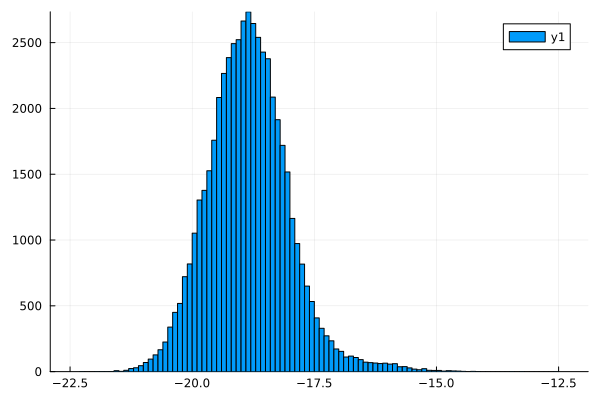

In [41]:
histogram(log10.(B), density=true)

In [43]:
cj.number_circular_orbits(8e-3, 0, cj.MM17Gamma1)

44

true